In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("cleaned_SuperMarket_Analysis.csv")

df.head()


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,...,gross_margin_percentage,gross_income,rating,hour,calculated_sales,day,day_of_week,month,week,is_weekend
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,13,548.9715,5,Saturday,1,1,1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,10,80.2200,8,Friday,3,10,0
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,13,340.5255,3,Sunday,3,9,1
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,20,489.0480,27,Sunday,1,4,1
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,10,634.3785,8,Friday,2,6,0


In [7]:
df[["quantity", "unit_price", "sales"]].describe()


,quantity,unit_price,sales
count,1000.000000,1000.000000,1000.000000
mean,5.510000,55.672130,322.966749
std,2.923431,26.494628,245.885335
min,1.000000,10.080000,10.678500
25%,3.000000,32.875000,124.422375
50%,5.000000,55.230000,253.848000
75%,8.000000,77.935000,471.350250
max,10.000000,99.960000,1042.650000


In [8]:
df[(df["quantity"] <= 0) | (df["unit_price"] <= 0)]


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,...,gross_margin_percentage,gross_income,rating,hour,calculated_sales,day,day_of_week,month,week,is_weekend


In [9]:
daily_sales = (
    df.groupby("date")["sales"]
      .sum()
      .reset_index()
)


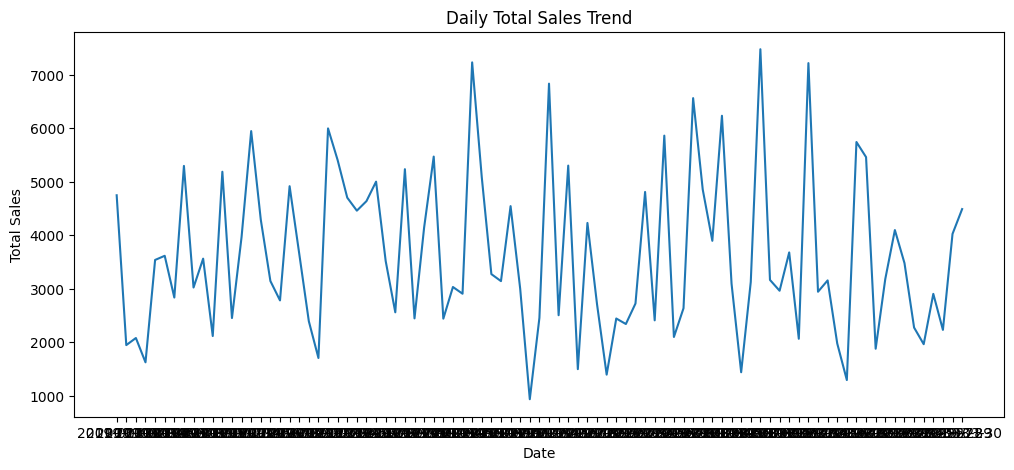

In [10]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [11]:
dow_sales = (
    df.groupby("day_of_week")["sales"]
      .sum()
      .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)


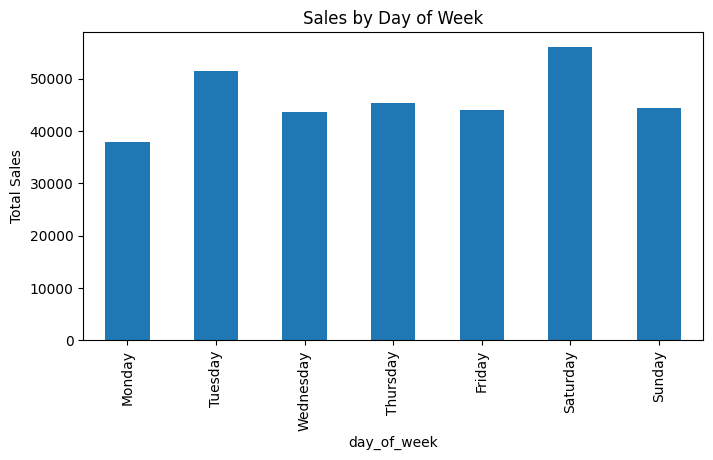

In [12]:
dow_sales.plot(kind="bar", figsize=(8,4), title="Sales by Day of Week")
plt.ylabel("Total Sales")
plt.show()


In [13]:
weekend_sales = df.groupby("is_weekend")["sales"].sum()
weekend_sales.index = ["Weekday", "Weekend"]


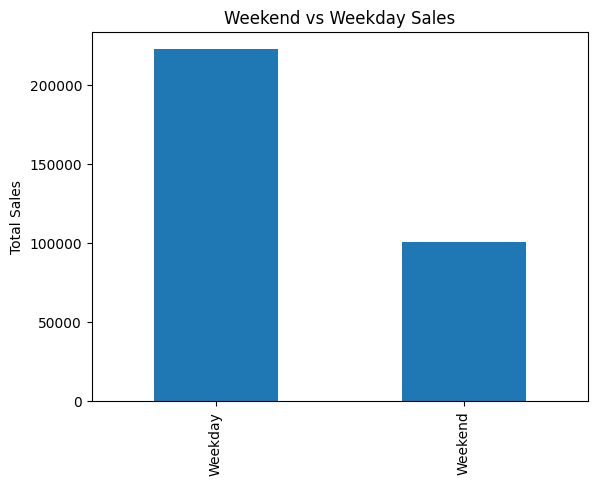

In [14]:
weekend_sales.plot(kind="bar", title="Weekend vs Weekday Sales")
plt.ylabel("Total Sales")
plt.show()


In [15]:
hourly_sales = df.groupby("hour")["sales"].sum()


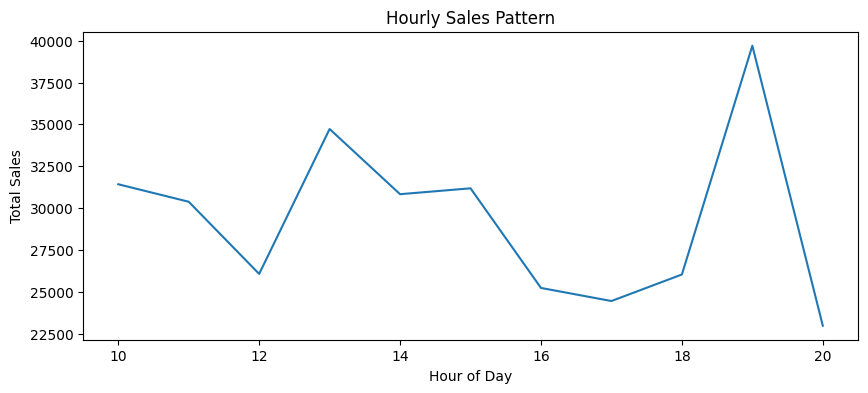

In [16]:
plt.figure(figsize=(10,4))
hourly_sales.plot()
plt.title("Hourly Sales Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.show()


In [17]:
product_sales = (
    df.groupby("product_line")["sales"]
      .sum()
      .sort_values(ascending=False)
)


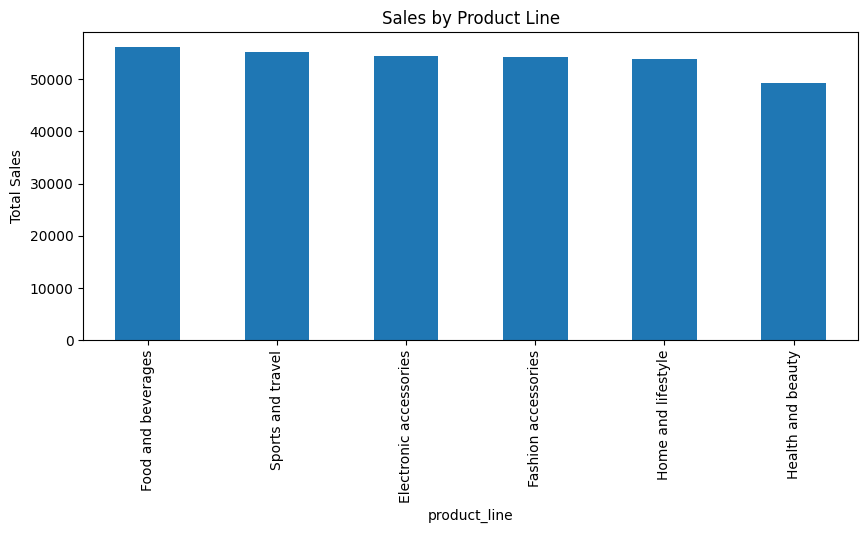

In [18]:
product_sales.plot(kind="bar", figsize=(10,4), title="Sales by Product Line")
plt.ylabel("Total Sales")
plt.show()


In [19]:
product_qty = (
    df.groupby("product_line")["quantity"]
      .sum()
      .sort_values(ascending=False)
)


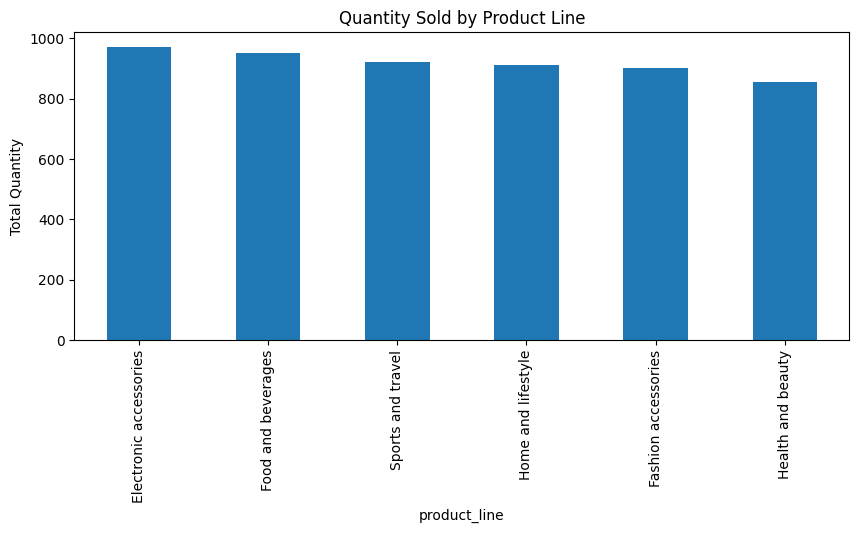

In [20]:
product_qty.plot(kind="bar", figsize=(10,4), title="Quantity Sold by Product Line")
plt.ylabel("Total Quantity")
plt.show()


In [21]:
product_variability = (
    df.groupby("product_line")["quantity"]
      .std()
      .sort_values(ascending=False)
)


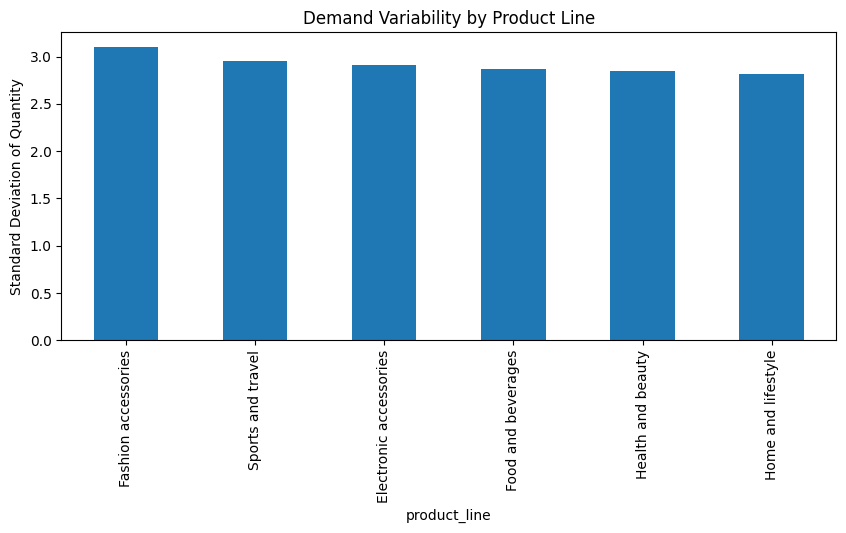

In [22]:
product_variability.plot(kind="bar", figsize=(10,4), title="Demand Variability by Product Line")
plt.ylabel("Standard Deviation of Quantity")
plt.show()


In [23]:
branch_sales = df.groupby("branch")["sales"].sum()


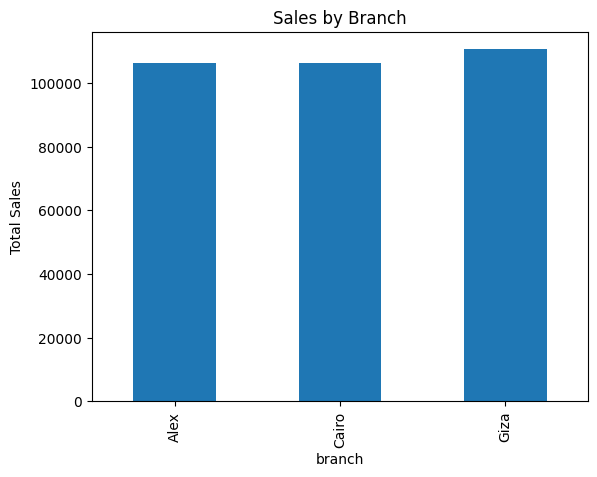

In [24]:
branch_sales.plot(kind="bar", title="Sales by Branch")
plt.ylabel("Total Sales")
plt.show()


In [25]:
daily_product_sales = (
    df.groupby(["date", "product_line"])
      .agg(
          daily_quantity=("quantity", "sum"),
          daily_sales=("sales", "sum")
      )
      .reset_index()
)
daily_product_sales.head()

,date,product_line,daily_quantity,daily_sales
0,2019-01-01,Electronic accessories,18,1382.745
1,2019-01-01,Fashion accessories,9,621.243
2,2019-01-01,Food and beverages,18,1066.023
3,2019-01-01,Health and beauty,2,132.027
4,2019-01-01,Home and lifestyle,8,399.756
